## Examen de conocimiento de programación e ingeniería de software

Para este examen se utilizan las liberias de pandas y matplotlib

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#### Lectura de los datos

Primero utilizare la libreria de pandas para leer el archivo csv, pasando como parametro el path del archivo a leer y el tipo de codificacion con el que este sera leido. En este caso sera la codificacion ISO-8859-1 (alfabeto latino) para poder dar lectura a caracteres especiales de nuestro alfabeto

In [113]:
#Lectura del archivo
df = pd.read_csv("covid-data/200511COVID19MEXICO.csv", encoding = "ISO-8859-1")


#### Procesamiento de los datos 

Procesaremos los datos originarios del cvs y nos quedaremos con los datos que nos interesa para nuestro estudio en cuestion.

In [114]:

#Eliminando los renglones que no contengan casos de personas con sintomas de Sonora
df_son = df.loc[df['ENTIDAD_UM'] == 26]
df_son

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
335,2020-05-11,043561,2,4,26,2,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
956,2020-05-11,1999a7,2,4,26,2,26,26,55,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
1045,2020-05-11,1e70bd,2,4,26,2,25,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1160,2020-05-11,07b5a7,2,4,26,1,26,26,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
1288,2020-05-11,1b9ce4,2,4,26,1,26,26,33,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
1648,2020-05-11,03fbe7,2,4,26,1,15,26,17,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1751,2020-05-11,0cc8e1,2,4,26,1,26,26,33,2,...,2,1,2,2,99,1,99,MÃ©xico,99,1
1890,2020-05-11,1ca631,2,4,26,1,26,26,33,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2185,2020-05-11,016b73,2,4,26,2,26,26,29,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2510,2020-05-11,03a083,2,4,26,2,26,26,48,1,...,1,1,2,2,99,1,99,MÃ©xico,99,97


In [115]:
#Con "groupby" agruparemos los renglones con la misma fecha en el campo FECHA_SINTOMAS y añadiremos una columna con el conteo de 
# de las ocurrencias. De igual manera se hara pero con las fechas iguales del campo FECHA_DEF.

tabla1_contagios = df_son.groupby(['FECHA_SINTOMAS']).size().to_frame('NUM_CONTAGIOS').reset_index()
tabla1_defunciones = df_son.groupby(['FECHA_DEF']).size().to_frame('DEFUNCIONES').reset_index()

#Con "merge" haremos un "join left" con los dataframe creados anteriormente donde coincidan las fechas. Eliminaremos la columna de FECHA_DEF y cambiaremos los NAN por 0's
tabla1 = pd.merge(tabla1_contagios, tabla1_defunciones, left_on='FECHA_SINTOMAS', right_on='FECHA_DEF', how='left').drop('FECHA_DEF', axis=1).fillna(0).rename(columns={"FECHA_SINTOMAS":"FECHA"})

tabla1

,FECHA,NUM_CONTAGIOS,DEFUNCIONES
0,2020-01-06,2,0.0
1,2020-01-10,1,0.0
2,2020-01-11,4,0.0
3,2020-01-12,1,0.0
4,2020-01-20,2,0.0
5,2020-01-21,1,0.0
6,2020-01-22,1,0.0
7,2020-01-25,2,0.0
8,2020-01-26,2,0.0
9,2020-01-27,3,0.0


In [43]:
#Guardando los datos del data frame en un archivo csv  llamado tabla1
tabla1.to_csv('covid-data/tabla1.csv', encoding = "ISO-8859-1")

In [79]:
#Filtrando y contando el numero de renglones para posteriormente guardarlos en variables.

sonora = len(df[(df['FECHA_INGRESO']!='9999-99-99') & (df['ENTIDAD_NAC']== 26)])
chihuahua = len(df[(df['FECHA_INGRESO']!='9999-99-99') & (df['ENTIDAD_NAC']== 8)])
nuevoLeon = len(df[(df['FECHA_INGRESO']!='9999-99-99') & (df['ENTIDAD_NAC']== 19)])
puebla = len(df[(df['FECHA_INGRESO']!='9999-99-99') & (df['ENTIDAD_NAC']== 21)])


#Creando un nuevo data frame con los datos de la cantidad de personas hospitalizadas

data = {'Sonora':sonora, 'Chihuaha':chihuaha, 'Nuevo Leon':nuevoLeon, 'Puebla':puebla}
data = {'Estado':['Sonora','Chihuahua','Nuevo Leon','Puebla'], 'Hospitalizados':[sonora, chihuahua, nuevoLeon, puebla]}
tabla2 = pd.DataFrame(data)
tabla2

,Estado,Hospitalizados
0,Sonora,2134
1,Chihuahua,1897
2,Nuevo Leon,6374
3,Puebla,4194


In [65]:
#guardando el data frame en un archivo csv llamado tabla2
tabla2.to_csv('covid-data/tabla2.csv', encoding = "ISO-8859-1")

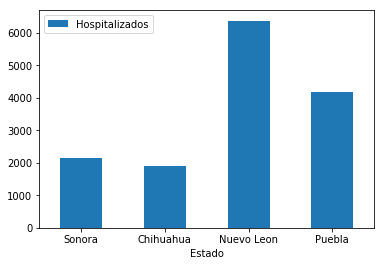

In [87]:
#utilizando la libreria pandas, se crea la grafica de barras
graficaBarras = tabla2.plot('Estado', 'Hospitalizados', kind='bar', rot=0).get_figure()

#Guardando en un archivo png
graficaBarras.savefig('covid-data/grafica1.png')

In [104]:
tabla3 = df.groupby(['FECHA_INGRESO']).size().to_frame('NUM_CONTAGIOS').reset_index()
tabla3

,FECHA_INGRESO,NUM_CONTAGIOS
0,2020-01-01,5
1,2020-01-02,16
2,2020-01-03,18
3,2020-01-04,6
4,2020-01-05,14
5,2020-01-06,28
6,2020-01-07,27
7,2020-01-08,16
8,2020-01-09,45
9,2020-01-10,39


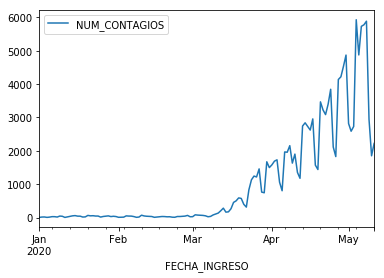

In [122]:
#De igual manera  se crea la grafica del numero de contagios en contraste con el tiempo 

tabla3['FECHA_INGRESO'] = pd.to_datetime(tabla3['FECHA_INGRESO'])

grafica2 = tabla3.plot(x='FECHA_INGRESO', y='NUM_CONTAGIOS').get_figure()

#Guardando en un archivo png
grafica2.savefig('covid-data/grafica2.png')


